In [1]:
%matplotlib inline

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

 #### Variables in the dataset:

 CRIM  ->   per capita crime rate by town
 
 ZN    ->  proportion of residential land zoned for lots over 25,000 sq.ft.
 
 INDUS ->   proportion of non-retail business acres per town
 
 CHAS  ->   Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
 NOX   ->   nitric oxides concentration (parts per 10 million)
 
 RM    ->   average number of rooms per dwelling
 
 AGE   ->   proportion of owner-occupied units built prior to 1940
 
 DIS   ->   weighted distances to five Boston employment centres
 
 RAD   ->   index of accessibility to radial highways
 
 TAX   ->   full-value property-tax rate per $10,000
 
 PTRATIO ->  pupil-teacher ratio by town
 
 B     ->  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 LSTAT ->  percent lower status of the population
 
 MEDV  ->   Median value of owner-occupied homes in $1000's

In [3]:
#columns names
col_names = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

In [4]:
#importing the dataset
housing_data = pd.read_fwf("housing.csv", names = col_names)

In [5]:
housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
print(f'Set size(row, col){housing_data.shape}')

Set size(row, col)(506, 14)


In [7]:
#types of the data
housing_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
#check for null values
null_values = sum(housing_data.isnull().sum())
if null_values == 0:
    print("There is no null values")
else:
    print("Check and fill the null values")

There is no null values


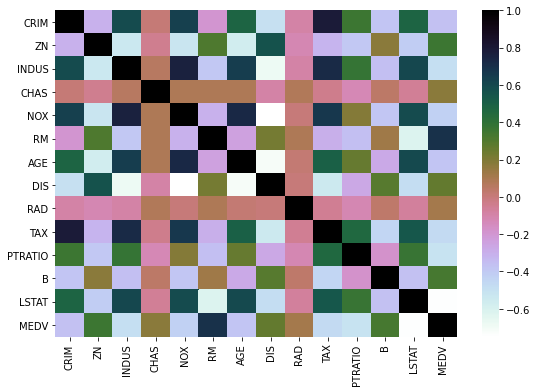

In [9]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(housing_data.corr() ,cmap='cubehelix_r',ax = ax)
plt.show()

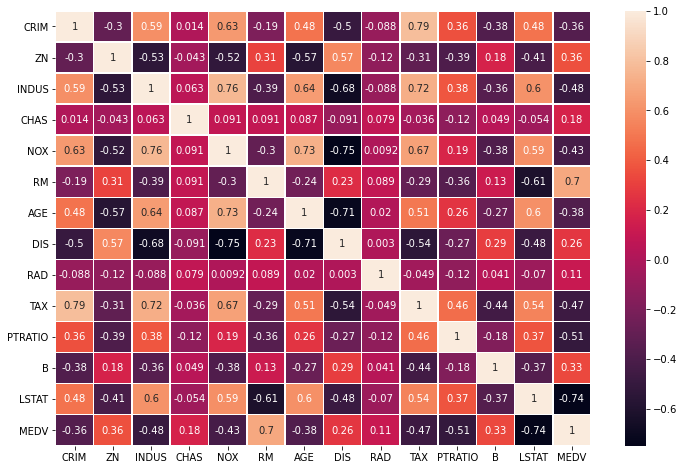

In [10]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(housing_data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

As we can see the value of the property(MEDV) is most dependent from the rooms count (RM) and from the lower status population (LSTAT)

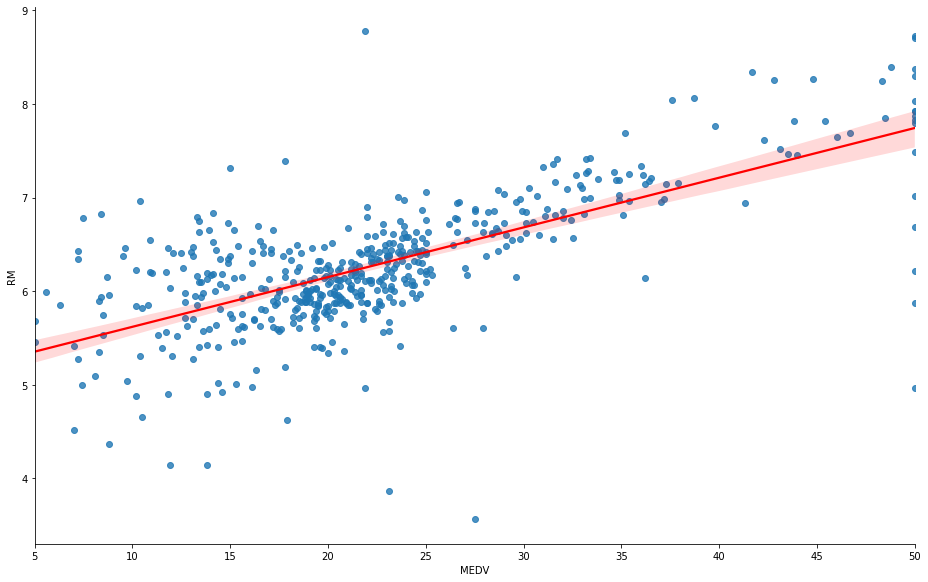

In [11]:
sns.lmplot(x="MEDV", y = "RM", data = housing_data, height=8 , aspect=8/5, line_kws={'color':'red'})
plt.show()

In the graph above, we can see thath thre price is rising with the count of rooms

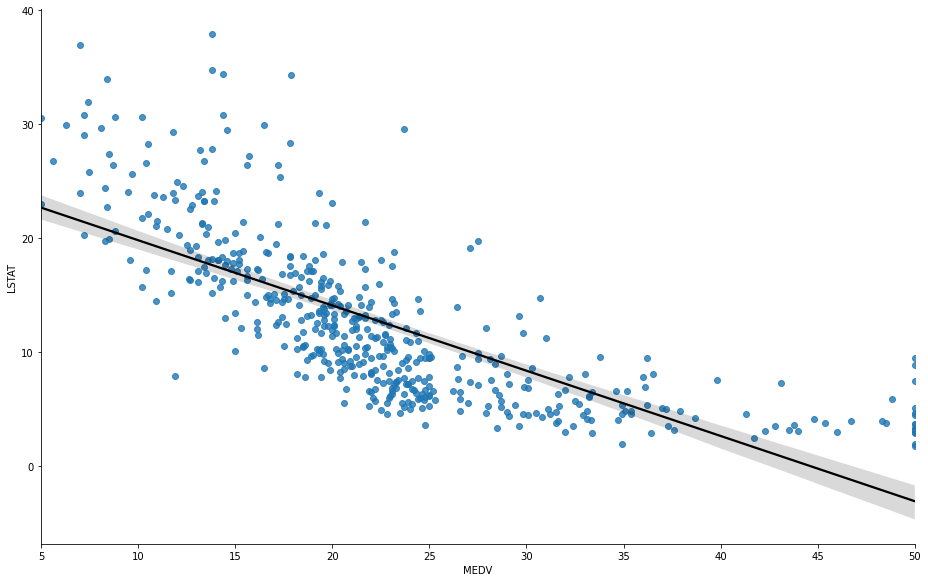

In [12]:
sns.lmplot(x="MEDV", y = "LSTAT", data = housing_data, height=8 , aspect=8/5, line_kws={'color':'black'})
plt.show()

And in this one, the higher the percentage of the lower class, lower the price of the house

In [13]:
# assign features and the target to the variables
X = housing_data.drop("MEDV", axis = 1)
y = housing_data.MEDV

In [14]:
linear_regressor = LinearRegression()
linear_regressor.fit(X,y)

LinearRegression()